In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [14]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Feynnlabs/Dataset.csv")

In [15]:
df=pd.get_dummies(data=df,columns=["State"],drop_first=True)

In [16]:
dist={k:i for i,k in enumerate(df.District)}

In [17]:
df.District=df.District.map(dist)

In [18]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [19]:
df.head()

,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years,Children_Breastfed_Total,Children_Received_Foods_Other_Than_Breast_Milk_Total,Children_Received_Ifa_Tablets_Syrup_Last_3_Months_Total,State_Bihar,State_Chhattisgarh,State_Jharkhand,State_Madhya Pradesh,State_Odisha,State_Rajasthan,State_Uttar Pradesh,State_Uttarakhand
0,0,64606,2371,1072.0,832.0,1328.0,76.5,62.1,67.7,4.3,55.3,22.5,12208.5,36.1,41.6,36.1,0,0,0,0,0,0,0,0
1,1,84012,2451,929.0,701.0,1171.0,67.8,52.4,73.7,3.4,55.7,21.6,16157.0,29.1,50.1,30.3,0,0,0,0,0,0,0,0
2,2,127158,5709,2964.0,2448.0,3474.0,71.3,64.5,82.0,2.7,61.7,27.8,22614.5,32.3,58.8,19.9,0,0,0,0,0,0,0,0
3,3,29048,984,1557.0,1360.0,1766.0,79.3,56.4,76.3,5.3,65.0,25.2,5225.5,31.5,44.5,24.4,0,0,0,0,0,0,0,0
4,4,75451,3467,1109.0,958.0,1265.0,80.4,66.6,78.5,7.5,74.1,14.5,13844.0,43.1,26.3,21.9,0,0,0,0,0,0,0,0


In [20]:
#Scaling
scalar=StandardScaler()
data=scalar.fit_transform(df)

In [21]:
from sklearn.cluster import DBSCAN
#Model fit
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(data)

In [22]:
#label
label=model.labels_
label

array([ 0,  0,  1,  0,  0,  0, -1,  0, -1, -1, -1,  1, -1, -1,  0,  0,  1,
       -1,  0,  0, -1,  1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3, -1,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4, -1, -1,  4,  4,  4,  4,
        4,  4,  4,  4,  4, -1,  4,  4, -1,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, -1,
        6, -1,  6,  6, -1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7, -1,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, -1,  8,  8,
        8,  8,  8,  8, -1,  8, -1,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [23]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 10


In [24]:
label

array([ 0,  0,  1,  0,  0,  0, -1,  0, -1, -1, -1,  1, -1, -1,  0,  0,  1,
       -1,  0,  0, -1,  1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3, -1,
        3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4, -1, -1,  4,  4,  4,  4,
        4,  4,  4,  4,  4, -1,  4,  4, -1,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, -1,
        6, -1,  6,  6, -1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7, -1,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, -1,  8,  8,
        8,  8,  8,  8, -1,  8, -1,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

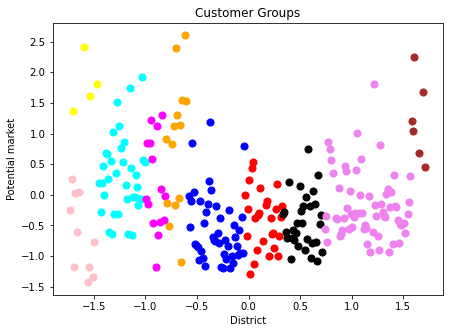

In [25]:
#Predict data
y_means = db.fit_predict(data)

#Plotting Graph
plt.figure(figsize=(7,5))
plt.scatter(data[y_means == 0, 0], data[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(data[y_means == 1, 0], data[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(data[y_means == 2, 0], data[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(data[y_means == 3, 0], data[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(data[y_means == 4, 0], data[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(data[y_means == 5, 0], data[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(data[y_means == 6, 0], data[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(data[y_means == 7, 0], data[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(data[y_means == 8, 0], data[y_means == 8, 1], s = 50, c = 'violet')
plt.scatter(data[y_means == 9, 0], data[y_means == 9, 1], s = 50, c = 'brown')
plt.title('Customer Groups')
plt.xlabel('District')
plt.ylabel('Potential market')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
#metrics.silhouette_score(data,label)